In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("framingham.csv")
x=dataset.iloc[:,:15]
y=dataset.iloc[:,15]
type(x)

pandas.core.frame.DataFrame

In [3]:
col=x.columns
print(col)

# nulls = dataset.isnull().sum()
# nulls

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


In [4]:
# count=0
# for i in  dataset.isnull().sum(axis=1):
#     if i>0:
#         count+=1
        
# x.dropna(axis=0)

In [5]:
for column in col:
    x[column]=x[column].replace('NA',np.NaN)
    mean=int(x[column].mean(skipna=True))
    x[column]=x[column].replace(np.NaN,mean)

In [194]:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# x= imputer.fit_transform(x)
# x= pd.DataFrame(x)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=1)

ran=RandomForestClassifier(bootstrap=True,n_estimators=100)
ran.fit(x_train,y_train)
ypred=ran.predict(x_test)

print("""Accuracy : {}
        Classification Report : {}""".format(accuracy_score(ypred,y_test),classification_report(ypred,y_test)))

Accuracy : 0.85
        Classification Report :              precision    recall  f1-score   support

          0       0.99      0.85      0.92      1043
          1       0.06      0.59      0.11        17

avg / total       0.98      0.85      0.91      1060



In [7]:
## Co-relation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cor=dataset.corr()
plt.figure(figsize=(16,16))
sns.heatmap(cor,annot=True)
plt.show()

<Figure size 1600x1600 with 2 Axes>

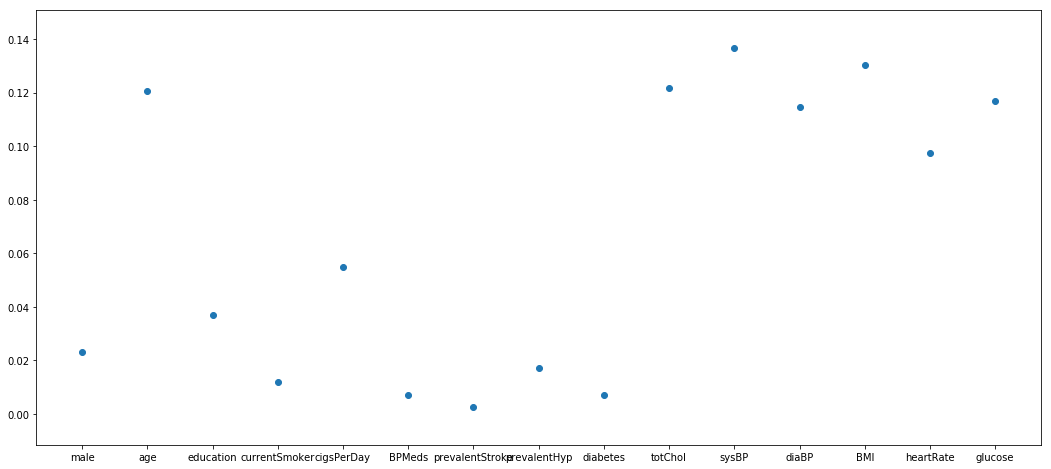

['male', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


In [8]:
## Feature Importance
imp=ran.feature_importances_

plt.figure(figsize=(18,8))
plt.scatter(col,imp)
plt.show()

su=imp.sum()
mean=su/(len(imp))

non_imp=[]
for i in range(len(imp)):
    if imp[i]<mean:
        non_imp.append(i)
        
non_imp_col=[]
for i in non_imp:
    non_imp_col.append(col[i])
    
print(non_imp_col)

dataset=dataset.drop(non_imp_col,axis=1)

x=dataset.iloc[:,:7]
y=dataset.iloc[:,7]

In [198]:
### Again Train model after the feature selection

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
x= imputer.fit_transform(x)
x= pd.DataFrame(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=1)

ran_a=RandomForestClassifier(bootstrap=True,n_estimators=100)
ran_a.fit(x_train,y_train)
ypred=ran_a.predict(x_test)

print("""Accuracy : {}
        Classification Report : {}""".format(accuracy_score(ypred,y_test),classification_report(ypred,y_test)))

# from sklearn.svm import SVC
# svc=SVC(kernel='linear')  # kernel='linear' (kernel='rbf',gamma=10)
# svc.fit(x_train,y_train)
# pred=svc.predict(x_test)

# print(accuracy_score(pred,y_test))

Accuracy : 0.8481132075471698
        Classification Report :              precision    recall  f1-score   support

          0       0.99      0.86      0.92      1035
          1       0.08      0.52      0.14        25

avg / total       0.97      0.85      0.90      1060



In [199]:
### Now Prediction on new data

new_data=pd.read_csv("new_data.csv")
new_pred=ran.predict(new_data)
print("Prediction (1 or 0) : {}".format(new_pred))

Prediction (1 or 0) : [1]
